In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
x = iris.data
y = iris.target

In [6]:
from sklearn.decomposition import PCA

### STEP 1 開啟PCA

In [7]:
pca = PCA(n_components = 2) #component是去定義維度

### STEP 2 訓練

In [8]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### STEP 3 預測

In [9]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [10]:
X = pca.transform(x)

In [11]:
X[87] #變成二維

array([ 0.81509524, -0.37203706])

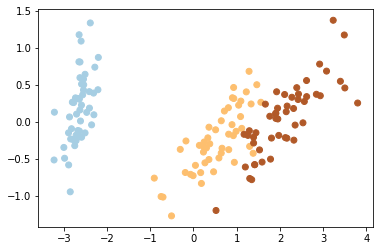

In [12]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'Paired')

### 準備訓練、測試資料

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)
#輸入是X，輸出是y

### STEP 1 開SVC函數學習機

In [15]:
from sklearn.svm import SVC

In [16]:
clf = SVC(gamma = 'auto')

### STEP 2 訓練

In [17]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### STEP 3 預測

In [18]:
y_predict = clf.predict(x_test)

In [19]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

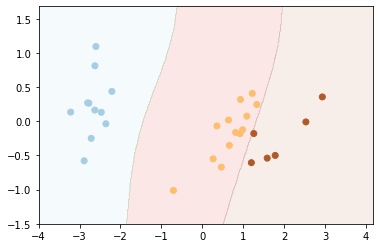

In [20]:
x0 = np.arange(-4, 4.2, 0.02)
y0 = np.arange(-1.5, 1.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()] #把數據拉平
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha = 0.1, cmap = 'Paired')
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test, cmap = 'Paired')

### K-means 自動分類（非監督式學習）
不需要自己區分訓練、測試資料，會自動分

In [21]:
x = np.random.rand(100, 2)

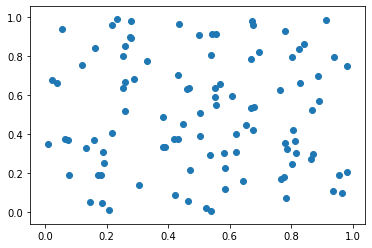

In [22]:
plt.scatter(x[:, 0], x[:, 1])

### STEP 1 開啟 K-Means 學習機

In [23]:
from sklearn.cluster import KMeans

In [24]:
clf = KMeans(n_clusters = 3)

### STEP 2 學習

In [25]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### STEP 3 預測

In [26]:
clf.predict(x)

array([1, 2, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 2,
       0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 2,
       1, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0,
       0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0])

In [27]:
clf.labels_

array([1, 2, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 2,
       0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 2,
       1, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0,
       0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0])

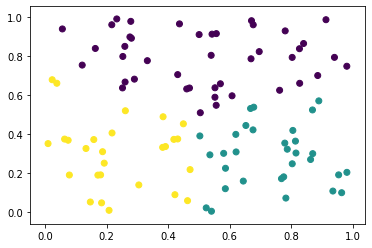

In [28]:
plt.scatter(x[:, 0], x[:, 1], c = clf.labels_)

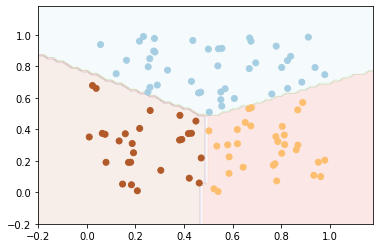

In [29]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()] #把數據拉平
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha = 0.1, cmap = 'Paired')
plt.scatter(x[:, 0], x[:, 1], c = clf.labels_, cmap = 'Paired')

###  
K-Means非常準確的原因是因為是電腦自己分的

### 使用 make-blobs 生成更像真實世界的數據

In [30]:
from sklearn.datasets.samples_generator import make_blobs

In [31]:
x, y = make_blobs(n_samples = 500, centers = 3,
                 n_features = 2, random_state = 0)

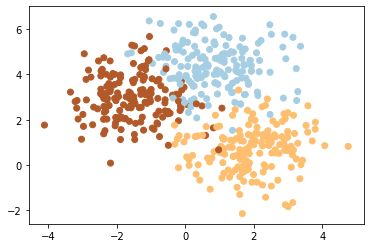

In [32]:
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = 'Paired')

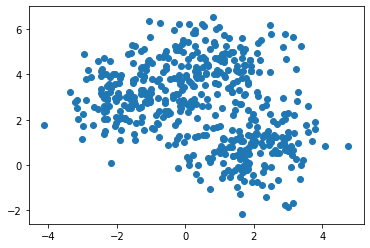

In [33]:
plt.scatter(x[:, 0], x[:, 1])

### STEP 1 開啟K-Means 函數學習機

In [34]:
clf = KMeans(n_clusters = 3)

### STEP 2 訓練

In [35]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### STEP 3 預測

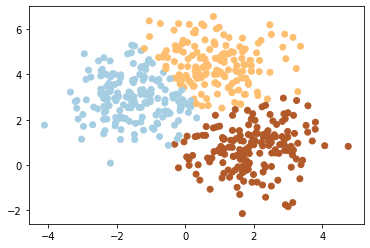

In [36]:
plt.scatter(x[:, 0], x[:, 1], c = clf.labels_, cmap = 'Paired')

### Mean-Shifts 完全自動分類

### STEP 1 開啟函數學習機

In [37]:
from  sklearn.cluster import MeanShift

In [38]:
clf = MeanShift(bandwidth=0.9) #bandwidth可以調整分群數量

### STEP 2 訓練

In [39]:
clf.fit(x)

MeanShift(bandwidth=0.9, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

### STEP 3 預測

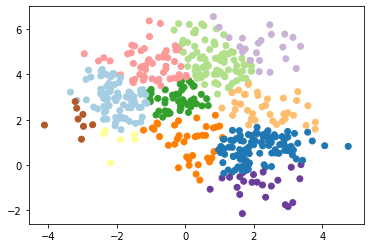

In [40]:
plt.scatter(x[:, 0], x[:, 1], c = clf.labels_, cmap = 'Paired')

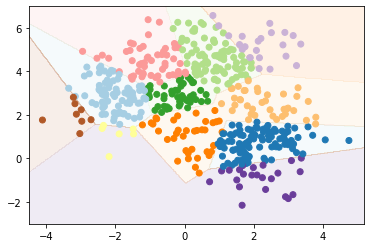

In [41]:
x0 = np.arange(-4.5, 5.2, 0.02)
y0 = np.arange(-3, 7, 0.02)

xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]#collection
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.contourf(xm, ym, Z, alpha = 0.1, cmap = 'Paired')
plt.scatter(x[:, 0], x[:, 1], c = clf.labels_, cmap = 'Paired')

## cross_val_score

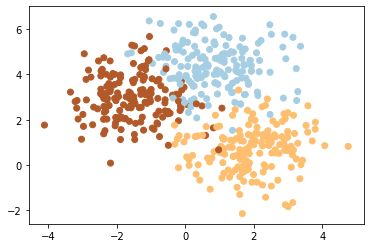

In [43]:
plt.scatter(x[:, 0], x[:, 1], c = y
            , cmap = 'Paired')

In [44]:
from sklearn.model_selection import cross_val_score

### SVC

In [45]:
from sklearn.svm import SVC

In [46]:
clf = SVC(gamma = 'auto')

In [47]:
scores = cross_val_score(clf, x, y, cv = 5) #CV是指定做的次數

In [48]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [49]:
scores.max()

0.98989898989899

In [50]:
scores.min()

0.9090909090909091

### 決策樹 Decision tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
clf = DecisionTreeClassifier()

In [53]:
scores = cross_val_score(clf, x, y, cv = 5)

In [54]:
scores.max()

0.9595959595959596

In [55]:
scores.min()

0.8787878787878788

### Bias-Variance Tradeoff

- Bias: 
model學習資料誤差的期望值

- Variance: 
overfitting（過度擬合）產生的誤差

### Solution: Emsemble Learning 總體學習
- Bagging: 把資料分成小袋去訓練
- Boosting: 做錯的加大權重

### Emsemble Learning - Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
clf = RandomForestClassifier(n_estimators = 100)

In [58]:
scores = cross_val_score(clf, x, y, cv = 5)

In [59]:
scores

array([0.92156863, 0.93069307, 0.96969697, 0.88888889, 0.88888889])

In [60]:
scores.max()

0.9696969696969697

In [61]:
scores.mean()

0.9199472888465318